# 00_data_collection.ipynb

-----

In [ ]:
# Data Collection and Cleaning Notebook

# This notebook loads the raw stock price data (downloaded with fetch_prices.py),
# inspects it, cleans missing values, and produces initial graphs.

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set paths
RAW_DIR = "../data/raw/"
PROCESSED_DIR = "../data/processed/"
os.makedirs(PROCESSED_DIR, exist_ok=True)

# Helper function to load multiple tickers
def load_data(tickers, period="5y", interval="1d"):
    datasets = {}
    for ticker in tickers:
        file_path = os.path.join(RAW_DIR, f"{ticker}_{period}_{interval}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, parse_dates=True, index_col=0)
            datasets[ticker] = df
            print(f"✅ Loaded {ticker} ({df.shape[0]} rows)")
        else:
            print(f"⚠️ File not found for {ticker}: {file_path}")
    return datasets

tickers = ["AAPL", "MSFT", "TSLA"]

data = load_data(tickers, period="5y", interval="1d")


✅ Loaded AAPL (1258 rows)
✅ Loaded MSFT (1258 rows)
✅ Loaded TSLA (1258 rows)


C:\Users\JUANJO\AppData\Local\Temp\ipykernel_26224\46662845.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=True, index_col=0)
C:\Users\JUANJO\AppData\Local\Temp\ipykernel_26224\46662845.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=True, index_col=0)
C:\Users\JUANJO\AppData\Local\Temp\ipykernel_26224\46662845.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=True, index_col=0)


In [5]:
# Check head, tail, and summary
for ticker, df in data.items():
    print(f"\n=== {ticker} ===")
    print(df.head())
    print(df.info())
    print("Missing values per column:\n", df.isna().sum())


=== AAPL ===
                         Close                High                 Low  \
Price                                                                    
Ticker                    AAPL                AAPL                AAPL   
Date                       NaN                 NaN                 NaN   
2020-09-29  110.97734832763672  112.16406499672252   110.4715384368565   
2020-09-30  112.65042877197266  114.06087381847615  110.52018216302427   
2020-10-01  113.60370635986328  114.50833415980816  112.66989821496011   

                          Open     Volume  
Price                                      
Ticker                    AAPL       AAPL  
Date                       NaN        NaN  
2020-09-29  111.42480495798578   99382200  
2020-09-30  110.68554238257225  142675200  
2020-10-01   114.4305149590877  116120400  
<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, Ticker to 2025-09-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------

In [6]:
cleaned_data = {}

for ticker, df in data.items():
    df = df.drop_duplicates()
    df = df.ffill().bfill()   # forward-fill then backward-fill just in case
    cleaned_data[ticker] = df
    
    # Save processed
    out_path = os.path.join(PROCESSED_DIR, f"{ticker}_cleaned.csv")
    df.to_csv(out_path)
    print(f"💾 Cleaned data saved for {ticker} -> {out_path}")

💾 Cleaned data saved for AAPL -> ../data/processed/AAPL_cleaned.csv
💾 Cleaned data saved for MSFT -> ../data/processed/MSFT_cleaned.csv
💾 Cleaned data saved for TSLA -> ../data/processed/TSLA_cleaned.csv


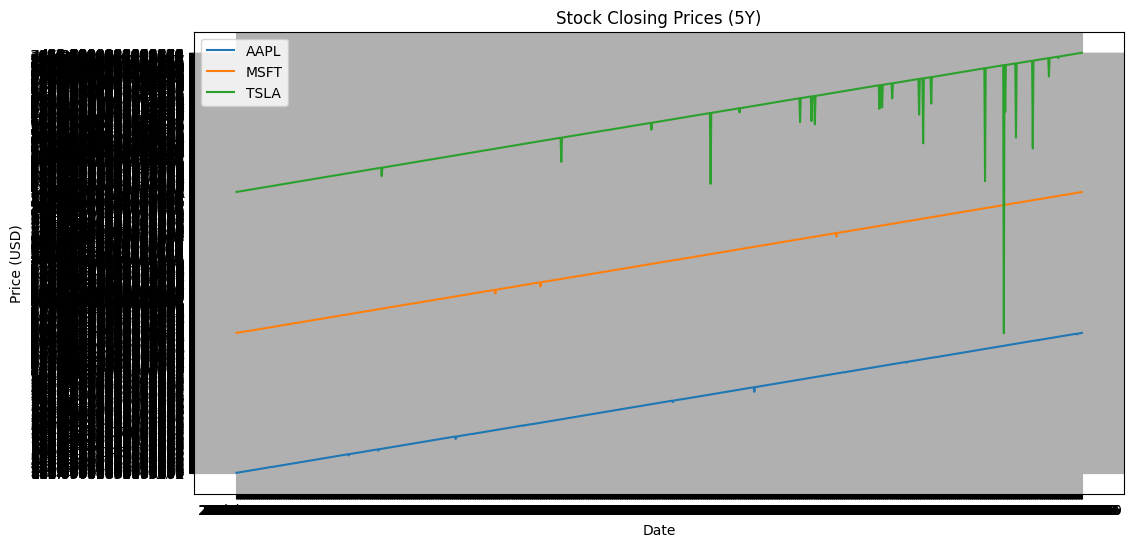

In [8]:
plt.figure(figsize=(12,6))
for ticker, df in cleaned_data.items():
    plt.plot(df.index, df["Close"], label=ticker)

plt.title("Stock Closing Prices (5Y)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Minute over minute returns and chart those then check its distributions

shapes, mean, kurtosis, skewness, etc... 

Daily: subsegment in specific dates, when markets are more volatile (near crisis = volatility is higher ) march 2020, etc... historical periods.

Tariffs - April 2025
Check extreme returns in the SP500 during the last years
Elections - October / November 2024
